In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

In Part I, we collected our data using the API, and cleaned the data in Part II. In Part III, we will perform visualization. 

We visualize the data so that we can detect any possible outliers, anomalies, and build intuition around the data before we perform machine learning modelling in Part IV.  

In this notebook, you will do the following:
1. Import pandas and data vizualization libraries
2. Visualize the taxi availability over the month
3. Visualize the taxi availability over the 24 hours in a day
4. Visualize the taxi availability by day of the week

<strong>Useful reading on visualization</strong>: 
1. <a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)
2. <a href = "https://machinelearningmastery.com/time-series-data-visualization-with-python/">Time Series Data Visualization with Python</a>

### Step 1: Import the following libraries


In [2]:
# Step 1: Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSV from Part II
We will now read the CSV from Part II using pandas.

Things to take note of: 
1. make sure 'time' is your index
2. parse the datetime in 'time' so that it's a proper DateTime object

In [17]:
# Step 2: Read your CSV as DateTime and make sure the dates are parsed
# data=pd.read_csv("/content/drive/MyDrive/taxi data/completedata_part_2.csv",index_col=[1])
# Step 2: Read CSV as DateTime and make sure the dates are parsed
data = pd.read_csv("/content/drive/MyDrive/taxi data/completedata_part_2.csv", parse_dates=True)
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')
del data["Unnamed: 0"]
data.head()

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2019-01-01 00:00:00,5887,1,0,0,167,979,81,408,3507,678,0,67,0
2019-01-01 00:05:00,4001,1,5,0,102,496,39,251,2589,471,0,53,0
2019-01-01 00:10:00,5981,1,10,0,157,1035,69,417,3546,680,0,77,0
2019-01-01 00:15:00,5461,1,15,0,158,920,68,375,3225,654,0,61,0
2019-01-01 00:20:00,5003,1,20,0,136,900,62,358,2898,596,0,53,0


### Step 3: Plot 'properties.taxi_count'
Onwards to our first plot - let's give 'properties.taxi_count' a try! When it comes to plotting, you have a few choices:
1. seaborn
2. matplotlib.pyplot
3. DataFrame plotting method


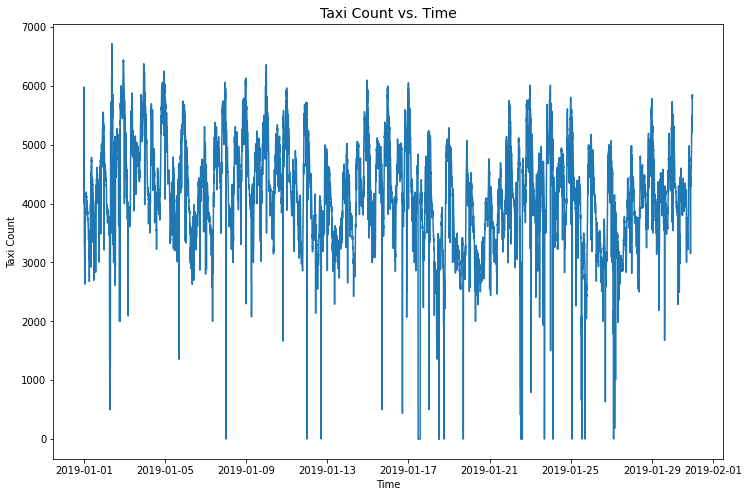

In [22]:
# Step 3: Plot properties.taxi_count vs time
plt.figure(figsize=(12,8))
plt.plot(data.index.values, data['properties.taxi_count'])
plt.title("Taxi Count vs. Time", fontsize = 14)
plt.xlabel("Time")
plt.ylabel("Taxi Count")
plt.show()

### Step 4: Investigate the odd datapoints
Wait a minute, what's going on here? If you've noticed, the visualzation suggests that there are 0 taxis available in Singapore on certain days. This simply cannot be. 

Check the parts in the DataFrame where "properties.taxi_count" == 0. You can do this by slicing the DataFrame based on the column values.


In [23]:
# Step 4: Get the slice where there is no taxi counts
data[data["properties.taxi_count"]==0]

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2019-01-08 00:10:00,0,2,10,0,0,0,0,0,0,0,0,0,0
2019-01-12 00:10:00,0,2,10,0,0,0,0,0,0,0,0,0,0
2019-01-12 16:55:00,0,2,55,16,0,0,0,0,0,0,0,0,0
2019-01-17 11:25:00,0,3,25,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:30:00,0,3,30,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:35:00,0,3,35,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:40:00,0,3,40,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:45:00,0,3,45,11,0,0,0,0,0,0,0,0,0
2019-01-17 11:50:00,0,3,50,11,0,0,0,0,0,0,0,0,0


### Step 5: Remove those erroneous rows
Looks like there was some downtime on those days, since all of the columns contain 0. As such, we'll just have to remove them. This is where visualization helps in identifying anomalous parts of the dataset. 


In [33]:
# Step 5: Remove rows where properties.taxi_count is 0
taxi_present = data[data['properties.taxi_count'] != 0]
taxi_present

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2019-01-01 00:00:00,5887,1,0,0,167,979,81,408,3507,678,0,67,0
2019-01-01 00:05:00,4001,1,5,0,102,496,39,251,2589,471,0,53,0
2019-01-01 00:10:00,5981,1,10,0,157,1035,69,417,3546,680,0,77,0
2019-01-01 00:15:00,5461,1,15,0,158,920,68,375,3225,654,0,61,0
2019-01-01 00:20:00,5003,1,20,0,136,900,62,358,2898,596,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-30 23:40:00,5782,5,40,23,233,1301,79,585,2591,986,0,7,0
2019-01-30 23:45:00,5843,5,45,23,220,1314,78,612,2645,961,0,13,0
2019-01-30 23:50:00,5825,5,50,23,214,1269,80,604,2685,960,0,13,0


### Step 6: Resample the DataFrame by day
The current plot seems very chaotic, and it's going to be hard to intuit anything from it, e.g., whether the data is cyclical, etc. 

As such, let's resample the DataFrame and take the median! This is so that we reduce intra-day variation, and focus on the median to identify if there is any possible pattern.



In [34]:
# Step 6: Resample your DataFrame by day, and take the day's median value
taxi_present_daily=taxi_present.resample("1D").median()
taxi_present_daily

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2019-01-01,4156.0,1.0,27.5,11.5,202.5,1027.0,73.0,496.0,1669.0,635.0,0.0,26.0,0.0
2019-01-02,4841.5,1.0,27.5,11.5,185.0,1032.0,74.0,498.0,2348.0,627.0,0.0,32.0,0.0
2019-01-03,4897.0,1.0,27.5,11.5,188.5,1036.0,79.0,518.5,2427.5,645.0,0.0,31.0,0.0
2019-01-04,4598.5,1.0,27.5,11.5,173.0,1012.5,76.0,469.5,2452.0,661.5,0.0,32.0,0.0
2019-01-05,4454.0,1.0,27.5,11.5,182.0,977.5,74.0,457.0,2085.0,658.5,0.0,34.0,0.0
2019-01-06,4071.5,1.0,27.5,11.5,173.0,926.5,62.0,443.0,1981.5,614.5,0.0,31.0,0.0
2019-01-07,4504.5,2.0,27.5,11.5,176.0,999.5,74.0,494.0,2148.0,667.5,0.0,28.0,0.0
2019-01-08,4657.0,2.0,30.0,12.0,171.0,1001.0,81.0,508.0,2230.0,695.0,0.0,28.0,0.0
2019-01-09,4662.0,2.0,27.5,11.5,166.5,985.0,79.0,486.0,2239.5,736.5,0.0,23.0,0.0


### Step 7: Plot 'properties.taxi_count' from the resampled DataFrame over original plot
Now that you've resampled the the DataFrame by day, it's time to plot it so that you can see the effects of your analysis. 

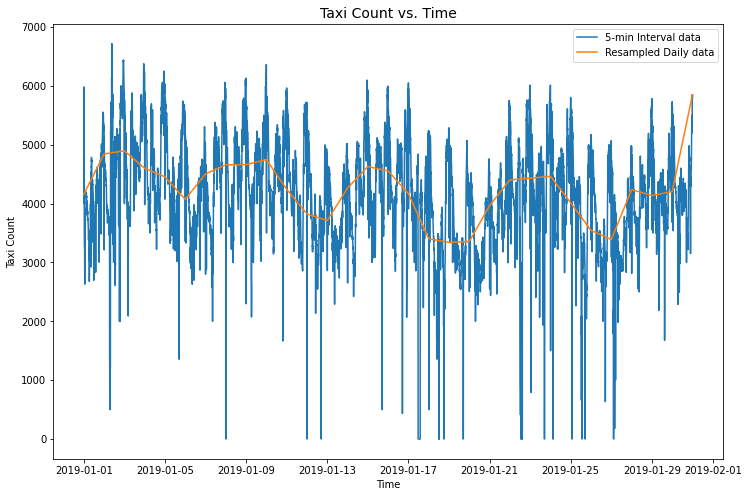

In [35]:
# Step 7: Plot resampled DataFrame over original plot
plt.figure(figsize=(12,8))
plt.plot(data.index.values, data['properties.taxi_count'],label="5-min Interval data")
plt.plot(taxi_present_daily.index.values, taxi_present_daily['properties.taxi_count'],label="Resampled Daily data")
plt.legend()
plt.title("Taxi Count vs. Time", fontsize = 14)
plt.xlabel("Time")
plt.ylabel("Taxi Count")
plt.show()


Once you resample, there is less intraday variation since you're taking only the median of the day. More importantly, we can see the rough cyclic nature of the available taxis throughout the month.

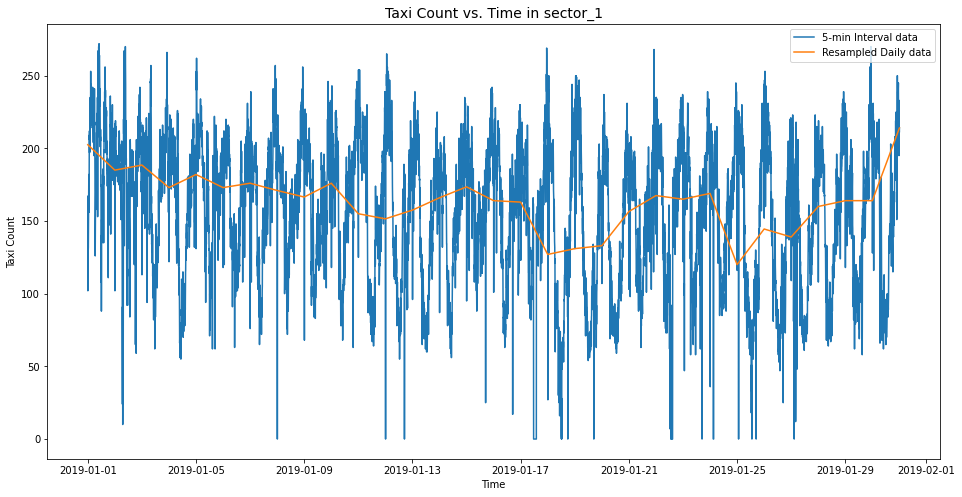

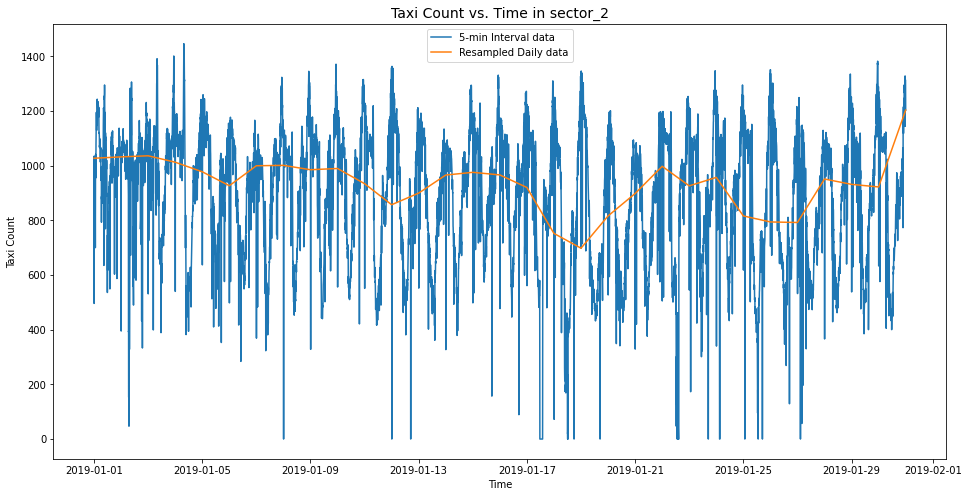

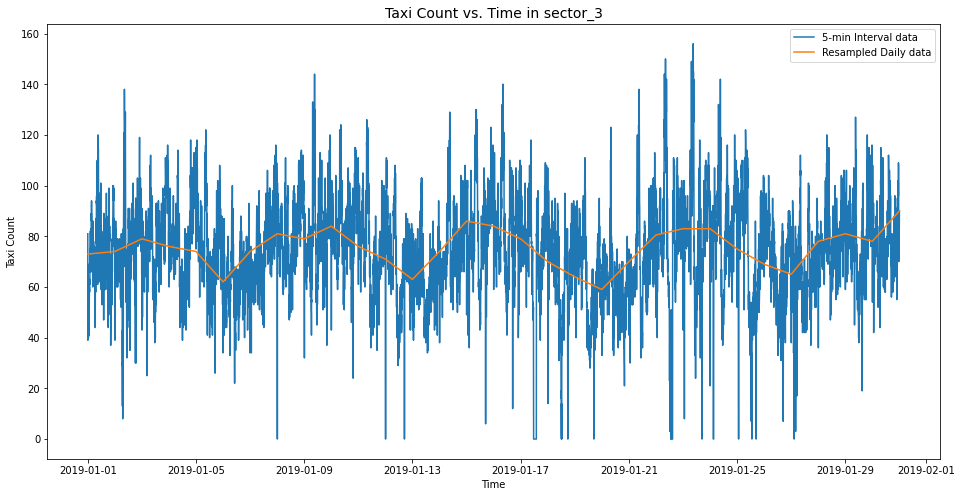

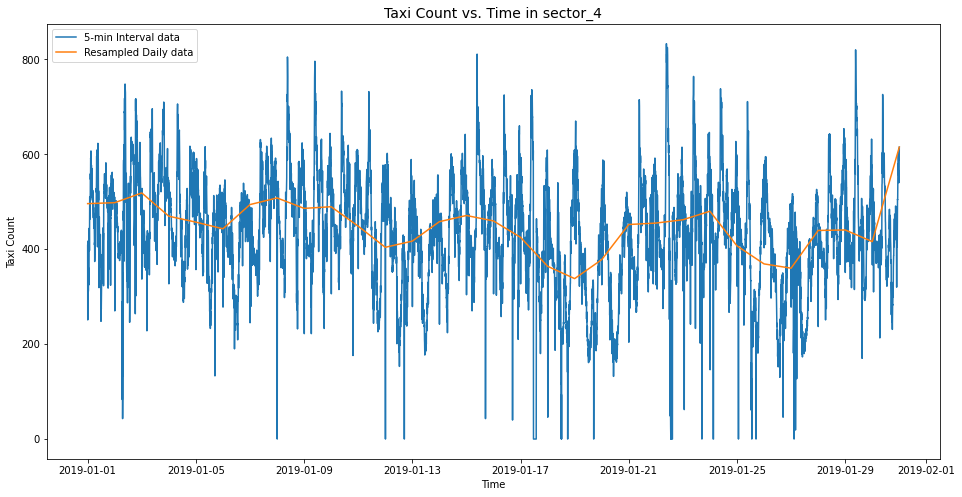

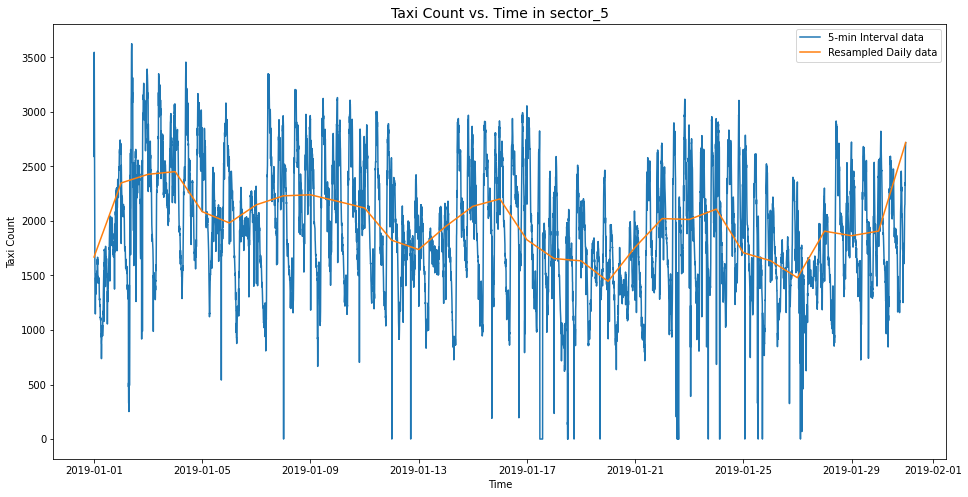

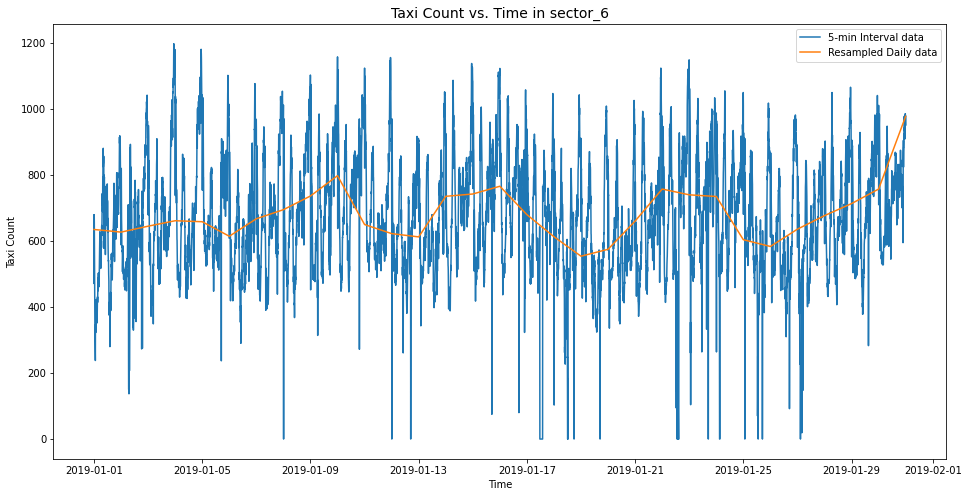

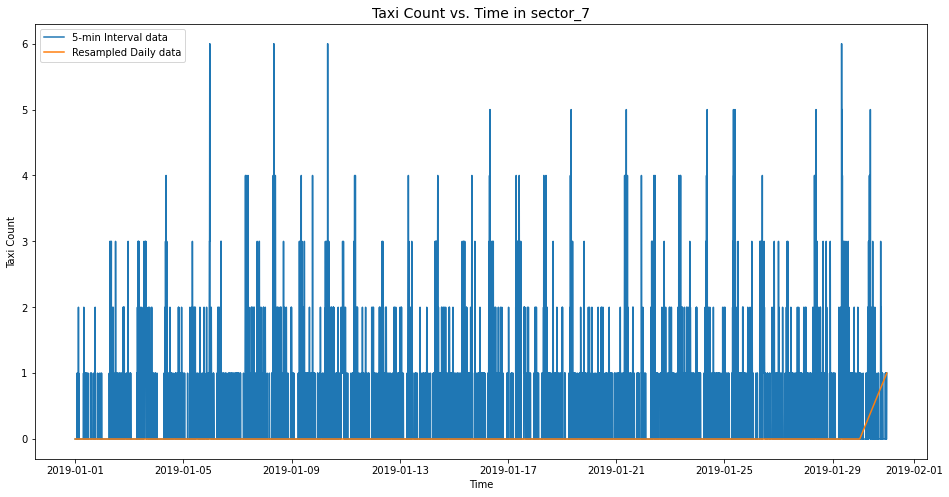

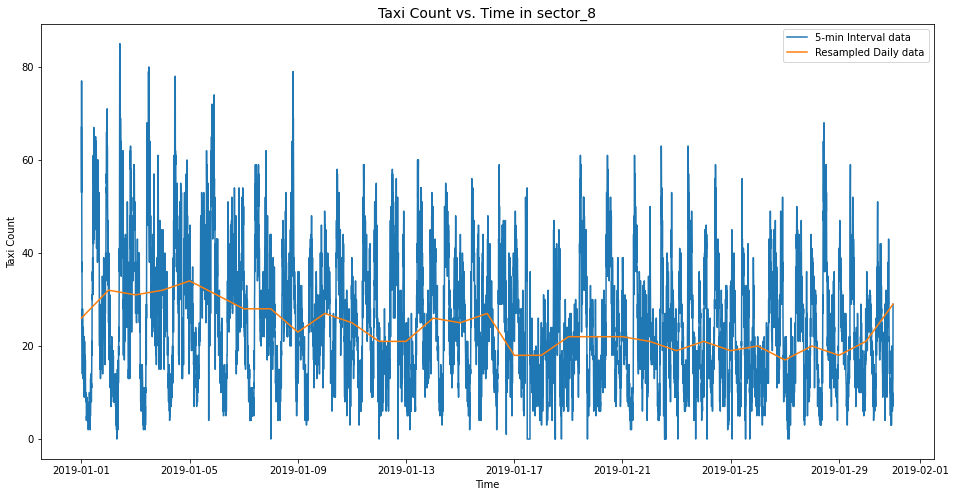

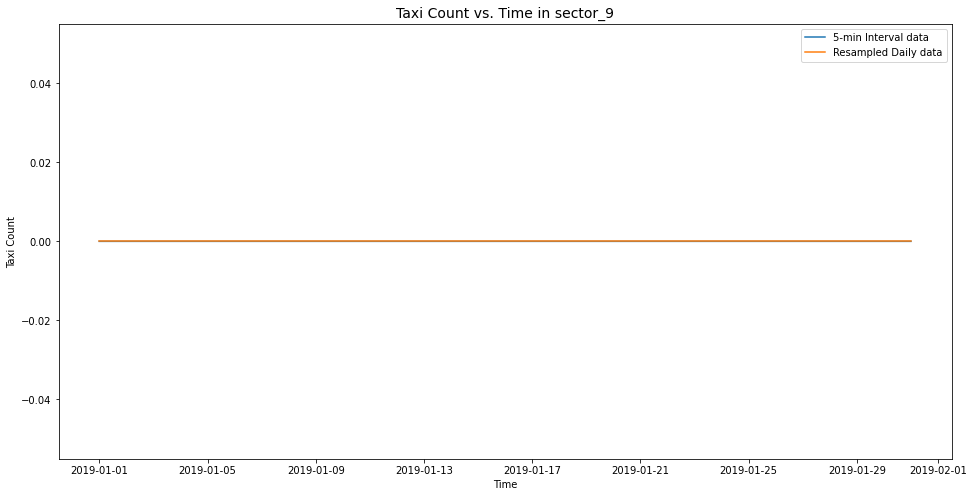

In [70]:
# [Optional] Do the same analysis for sectors 1-9
for i in range(1,10):
  parameter="sector_"+str(i)
  plt.figure(figsize = (16, 8))
  plt.plot(data.index.values, data[parameter],label="5-min Interval data")
  plt.plot(taxi_present_daily.index.values, taxi_present_daily[parameter],label="Resampled Daily data")
  plt.legend()
  plt.title("Taxi Count vs. Time in "+parameter, fontsize = 14)
  plt.xlabel("Time")
  plt.ylabel("Taxi Count")
  plt.show()

### Step 10: Get the hourly average of taxi availability
Get the hourly average data of the DataFrame. This means we'll be averaging all of the taxi availability for the hours of the day, across all days. 


In [40]:
# Step 10: Get the DataFrame containing the hourly average
taxi_present_hourly=taxi_present.groupby(by=[taxi_present.index.hour]).mean()
taxi_present_hourly

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
0,4940.000000,2.810585,27.520891,0.0,196.239554,1072.061281,78.381616,479.303621,2263.041783,821.997214,0.303621,28.671309,0.0
1,4751.481894,2.796657,27.520891,1.0,199.618384,1099.415042,73.295265,483.292479,2253.189415,618.651811,0.142061,23.877437,0.0
2,4591.649860,2.789916,27.324930,2.0,190.983193,1075.439776,72.722689,451.072829,2263.408964,512.386555,0.134454,25.501401,0.0
3,4133.565826,2.789916,27.689076,3.0,192.809524,1060.030812,76.285714,415.061625,1883.778711,483.268908,0.089636,22.240896,0.0
4,4010.252778,2.800000,27.500000,4.0,200.222222,1068.925000,77.391667,408.752778,1687.322222,550.175000,0.038889,17.425000,0.0
5,3808.086111,2.800000,27.500000,5.0,186.730556,1045.144444,69.519444,397.083333,1456.241667,638.058333,0.088889,15.219444,0.0
6,3447.136111,2.800000,27.500000,6.0,151.002778,935.547222,74.100000,356.269444,1157.811111,760.497222,0.325000,11.583333,0.0
7,3711.058333,2.800000,27.500000,7.0,138.788889,910.383333,90.300000,416.080556,1315.605556,827.608333,1.030556,11.261111,0.0
8,3441.280556,2.800000,27.500000,8.0,117.716667,780.572222,94.833333,454.705556,1286.775000,693.744444,1.416667,11.516667,0.0


### Step 11: Plot the hourly average of 'properties.taxi_count' using barplot
Time to plot the the averages to see if there's a pattern.

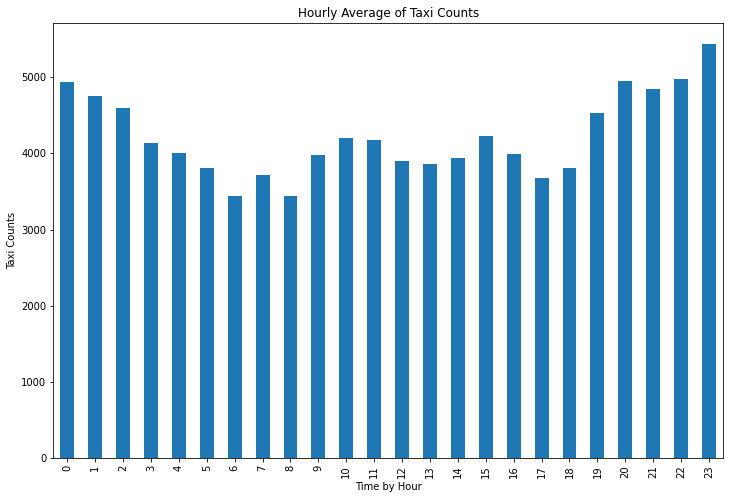

In [46]:
# Step 11: Plot the hourly average of 'properties.taxi_count'
plt.figure(figsize=(12,8))
taxi_present_hourly["properties.taxi_count"].plot.bar()
plt.title("Hourly Average of Taxi Counts")
plt.xlabel("Time by Hour")
plt.ylabel("Taxi Counts")
plt.show()

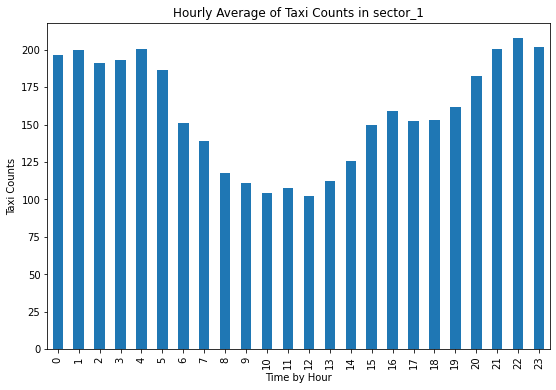

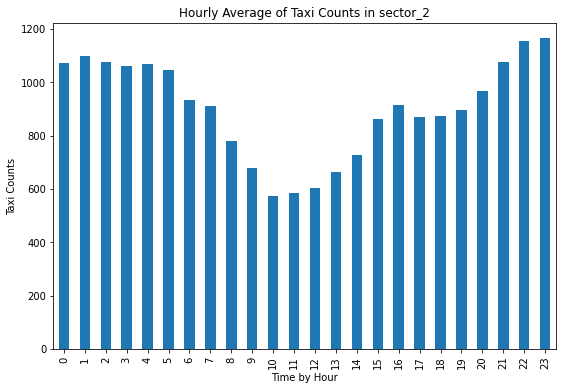

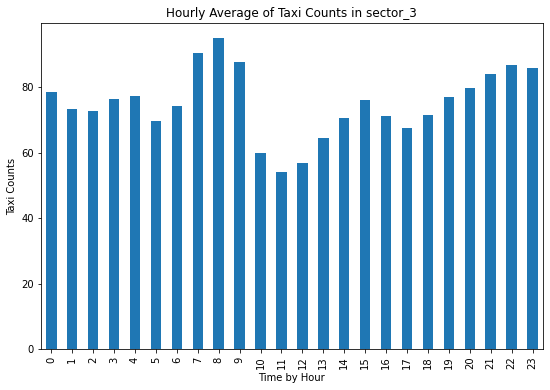

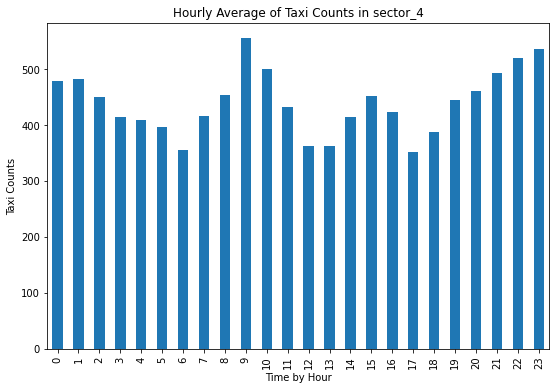

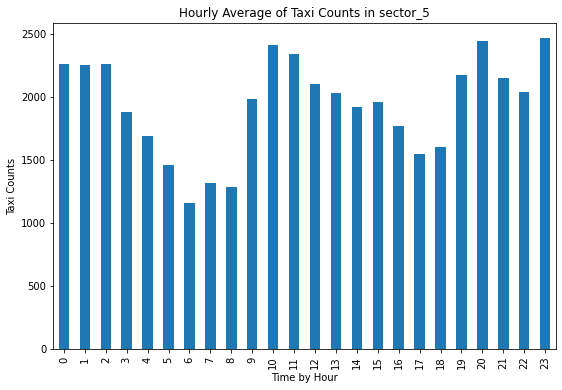

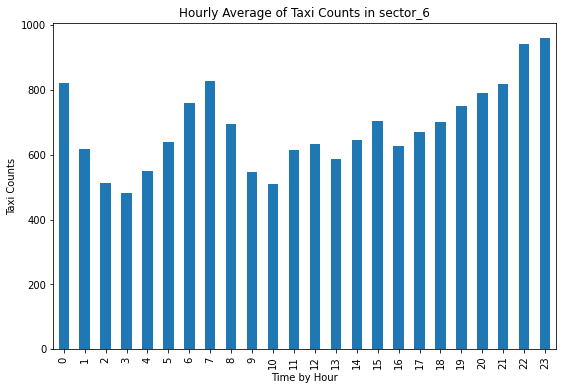

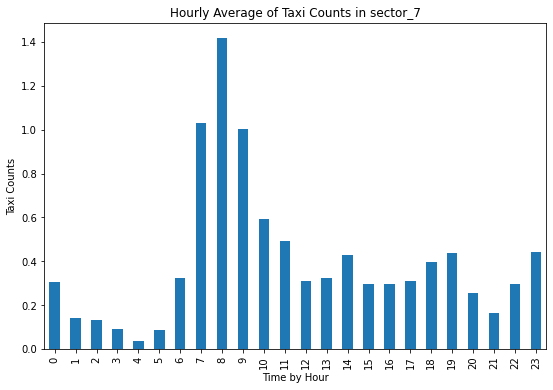

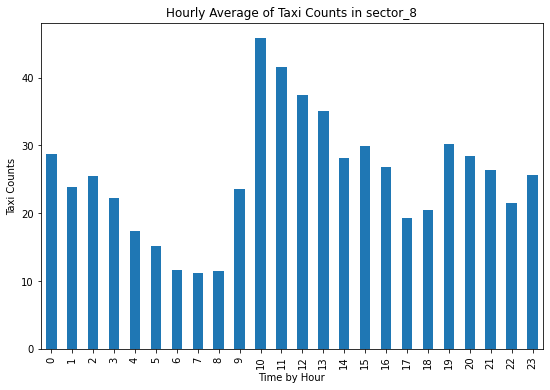

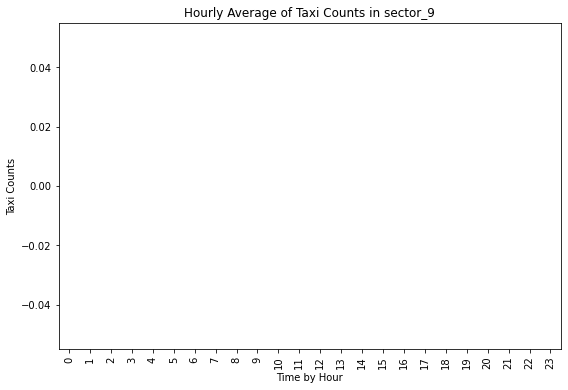

In [66]:
#  Additional plots for sectors 1-9
for i in range(1,10):
  parameter="sector_"+str(i)
  plt.figure(figsize = (9, 6))
  taxi_present_hourly[parameter].plot.bar()
  plt.title("Hourly Average of Taxi Counts in "+parameter)
  plt.xlabel("Time by Hour")
  plt.ylabel("Taxi Counts")
  plt.show()

### Step 12: Get the day of week average DataFrame
At first, we got the hourly average of the data. Next, we will get the day of week average. I.e. the averages of Monday, Tuesday, ..., Sunday.

In [50]:
# Step 12: Get the day of week average
taxi_present_weekly=taxi_present.groupby(by=[taxi_present.index.day_of_week]).mean()
taxi_present_weekly

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
0,4236.539062,3.500000,27.500000,11.500000,157.656250,894.095486,76.335938,460.019965,1921.391493,701.588542,0.513889,24.937500,0.0
1,4361.679047,2.992292,27.480729,11.491240,170.686755,944.627891,80.146461,474.751927,1965.631395,699.955851,0.384022,25.494744,0.0
2,4476.230716,2.999305,27.480890,11.496873,162.587908,929.720639,80.020848,469.136206,2088.715080,720.619875,0.411397,25.018763,0.0
3,4566.809311,2.481647,27.412713,11.511191,167.230976,954.558639,81.008953,482.367950,2133.360788,722.243509,0.467323,25.571173,0.0
4,4144.194590,2.494764,27.495637,11.498255,146.516579,865.805410,73.019197,415.032286,1954.999127,663.921466,0.374346,24.526178,0.0
5,3984.288077,2.500435,27.467363,11.502176,154.031332,877.449956,69.643168,389.309835,1822.750218,643.840731,0.358573,26.904265,0.0
6,3717.925282,2.498697,27.489140,11.508254,148.900956,847.705474,62.778454,378.450043,1632.304083,623.128584,0.304083,24.353606,0.0


### Step 13: Plot the day of week average for 'properties.taxi_count", and sectors 1-9
You know the drill - plot the day of week average for 'properties.taxi_count' and the nine sectors.

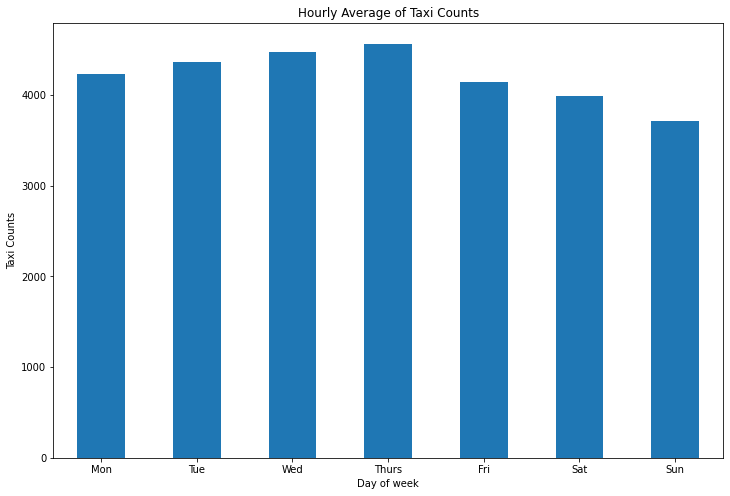

In [60]:
# Step 13: Plot day of week average for properties.taxi_count

plt.figure(figsize=(12,8))
taxi_present_weekly["properties.taxi_count"].plot.bar()
plt.title("Hourly Average of Taxi Counts")
plt.xlabel("Day of week")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thurs","Fri","Sat","Sun"],rotation=0)
plt.ylabel("Taxi Counts")
plt.show()


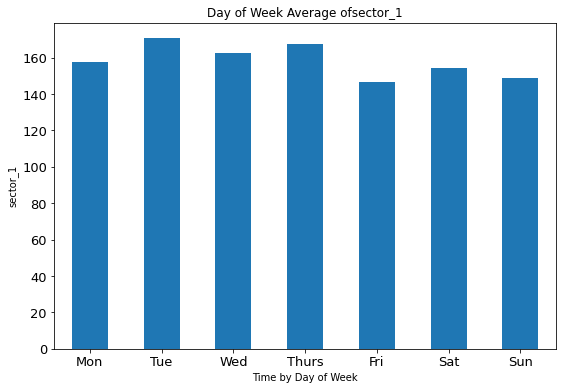

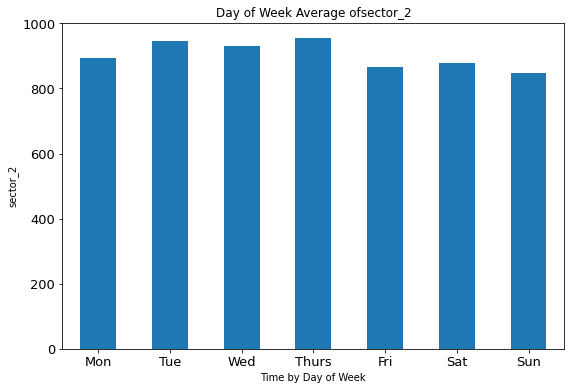

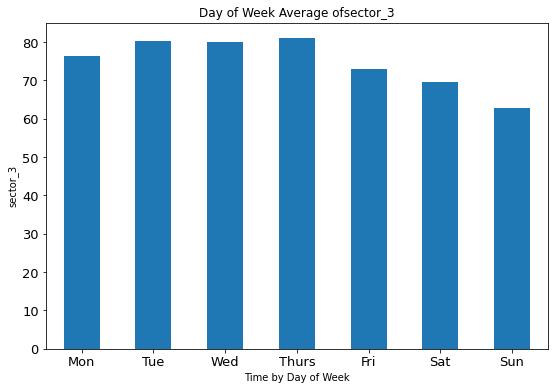

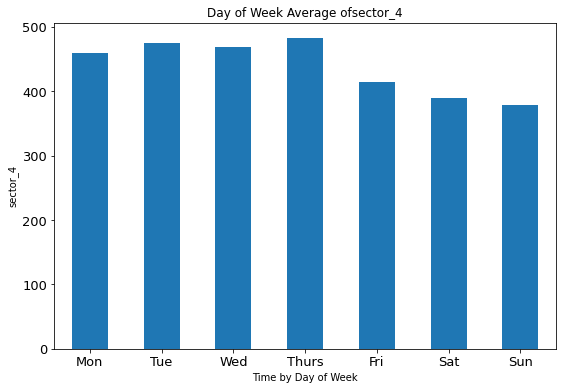

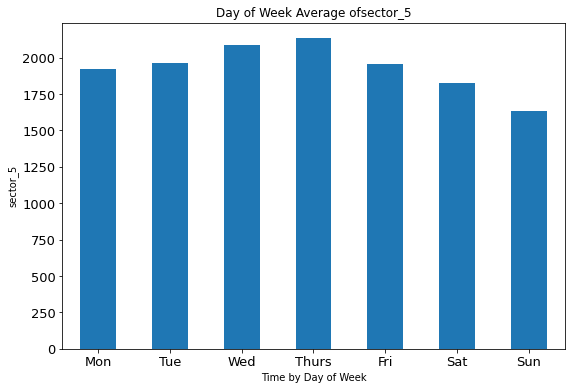

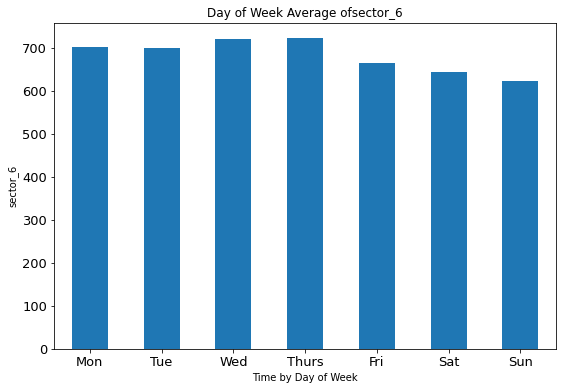

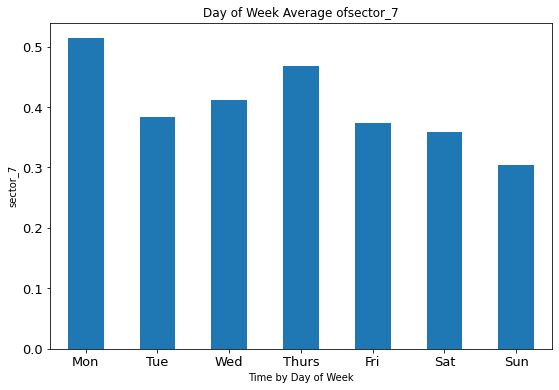

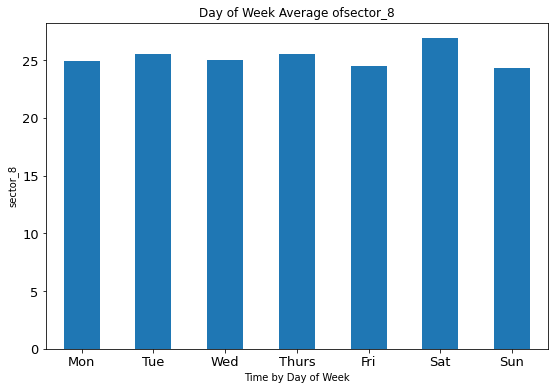

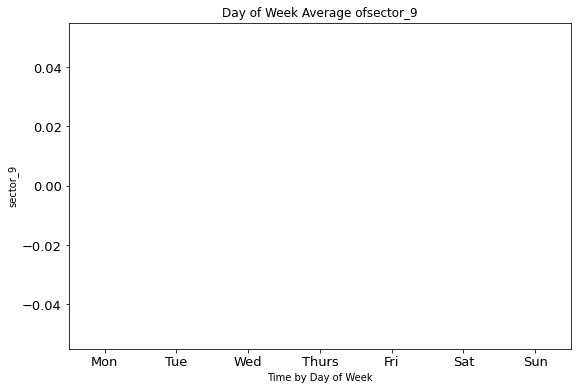

In [64]:
# Plot day of week average for sectors 1-9
for i in range(1,10):
  parameter="sector_"+str(i)
  plt.figure(figsize = (9, 6))
  taxi_present_weekly[parameter].plot.bar()
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13)
  plt.title("Day of Week Average of" + parameter)
  plt.xlabel("Time by Day of Week")
  plt.ylabel(parameter)
  plt.xticks(range(0,7),["Mon","Tue","Wed","Thurs","Fri","Sat","Sun"],rotation=0)
  plt.show()

### Step 14: Drop the columns that don't contain data
You might have already noticed that there are some sectors that do not contain any coordinates. These are sectors 3, 7, and 9. 

Let's just drop these columns.

In [71]:
# Step 14: Remove the columns from the DataFrame
cleaned_data = taxi_present.drop(columns=['sector_3','sector_7', 'sector_9'])
cleaned_data_2 = taxi_present.drop(columns=['sector_7', 'sector_9'])
cleaned_data

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_4,sector_5,sector_6,sector_8
time,,,,,,,,,,
2019-01-01 00:00:00,5887,1,0,0,167,979,408,3507,678,67
2019-01-01 00:05:00,4001,1,5,0,102,496,251,2589,471,53
2019-01-01 00:10:00,5981,1,10,0,157,1035,417,3546,680,77
2019-01-01 00:15:00,5461,1,15,0,158,920,375,3225,654,61
2019-01-01 00:20:00,5003,1,20,0,136,900,358,2898,596,53
...,...,...,...,...,...,...,...,...,...,...
2019-01-30 23:40:00,5782,5,40,23,233,1301,585,2591,986,7
2019-01-30 23:45:00,5843,5,45,23,220,1314,612,2645,961,13
2019-01-30 23:50:00,5825,5,50,23,214,1269,604,2685,960,13


# Step 15: Export your DataFrame as CSV
In this Part, we transformed our data and visualized them to identify patterns and outliers. We firstly successfully identify odd rows containing absolutely no available taxis, and we also removed sectors in the dataset that wasn't useful, i.e. 0 at all times.

In [72]:
# Step 15: Export your cleaned DataFrame as CSV
cleaned_data.to_csv ('/content/drive/MyDrive/taxi data/Cleaned_DataFrame.csv')
cleaned_data_2.to_csv ('/content/drive/MyDrive/taxi data/Cleaned_DataFrame_2.csv')